In [1]:
import pandas as pd

In [16]:
fd = '/home/dara/Downloads/communities+and+crime+unnormalized'

In [33]:
crimedata = pd.read_csv(f"{fd}/crimedata.csv", sep='\s*,\s*',encoding='latin-1',engine='python',na_values=["?"])
crimedata.head(n=10)

crimeOccurence           Êcommunityname state  countyCode  communityCode  \
0               1  BerkeleyHeightstownship    NJ        39.0         5320.0   
1               1           Marpletownship    PA        45.0        47616.0   
2               1               Tigardcity    OR         NaN            NaN   
3               1         Gloversvillecity    NY        35.0        29443.0   
4               1              Bemidjicity    MN         7.0         5068.0   
5               1          Springfieldcity    MO         NaN            NaN   
6               1              Norwoodtown    MA        21.0        50250.0   
7               1             Andersoncity    IN         NaN            NaN   
8               1                Fargocity    ND        17.0        25700.0   
9               1                 Wacocity    TX         NaN            NaN   

   fold  population  householdsize  racepctblack  racePctWhite  ...  \
0     1       11980           3.10          1.37         91.78  ...   
1     1       23123           2.82          0.80         95.57  ...   
2     1       29344           2.43          0.74         94.33  ...   
3     1       16656           2.40          1.70         97.35  ...   
4     1       11245           2.76          0.53         89.16  ...   
5     1      140494           2.45          2.51         95.65  ...   
6     1       28700           2.60          1.60         96.57  ...   
7     1       59459           2.45         14.20         84.87  ...   
8     1       74111           2.46          0.35         97.11  ...   
9     1      103590           2.62         23.14         67.60  ...   

   burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  \
0        14.0       114.85      138.0     1132.08       16.0           131.26   
1        57.0       242.37      376.0     1598.78       26.0           110.55   
2       274.0       758.14     1797.0     4972.19      136.0           376.30   
3       225.0      1301.78      716.0     4142.56       47.0           271.93   
4        91.0       728.93     1060.0     8490.87       91.0           728.93   
5      2094.0      1386.46     7690.0     5091.64      454.0           300.60   
6       110.0       372.09      288.0      974.19      144.0           487.10   
7       608.0       997.60     2250.0     3691.79      125.0           205.10   
8       425.0       532.66     3149.0     3946.71      206.0           258.18   
9      2397.0      2221.81     6121.0     5673.63     1070.0           991.80   

   arsons  arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0     2.0         16.41                41.02        1394.59  
1     1.0          4.25               127.56        1955.95  
2    22.0         60.87               218.59        6167.51  
3     NaN           NaN               306.64            NaN  
4     5.0         40.05                  NaN        9988.79  
5   134.0         88.72               442.95        6867.42  
6    17.0         57.50               226.63        1890.88  
7     9.0         14.77               439.73        4909.26  
8     8.0         10.03               115.31        4747.58  
9    18.0         16.68              1544.24        8903.93  

[10 rows x 148 columns]

In [35]:
# communities.names
statetoregion = pd.read_csv(f"{fd}/states.csv")
statetoregion.head()
statetoregion.drop('Division',axis=1)
statetoregion = statetoregion.rename(columns={'State Code':'statecode'})

crimedata.head()
crimedata = crimedata.rename(columns={'Êcommunityname':'communityName'})
crimedata = crimedata.rename(columns={'state':'statecode'})
crimedata= pd.merge(crimedata, statetoregion, on='statecode', how='outer')

crimedata.head()

crimeOccurence  communityName statecode  countyCode  communityCode  fold  \
0             1.0  Anchoragecity        AK         NaN            NaN   5.0   
1             1.0     Juneaucity        AK         NaN            NaN   7.0   
2             1.0  Fairbankscity        AK         NaN            NaN  10.0   
3             0.0      Selmacity        AL         NaN            NaN   1.0   
4             0.0   Bessemercity        AL         NaN            NaN   2.0   

   population  householdsize  racepctblack  racePctWhite  ...  larcPerPop  \
0    226338.0           2.74          6.43         80.74  ...     4205.13   
1     26751.0           2.70          1.09         80.63  ...     2966.01   
2     30843.0           2.83         12.96         72.35  ...     4268.13   
3     23755.0           2.72         58.44         41.00  ...     7430.07   
4     33497.0           2.66         58.37         41.41  ...     5265.29   

   autoTheft  autoTheftPerPop  arsons  arsonsPerPop  ViolentCrimesPerPop  \
0     1387.0           547.14   105.0         41.42               872.98   
1       59.0           204.19     7.0         24.23               114.21   
2      241.0           704.53     2.0          5.85               742.54   
3      131.0           527.27     NaN           NaN              3268.26   
4      442.0          1377.89    38.0        118.46              2758.90   

   nonViolPerPop    State  Region            Division  
0        5535.31   Alaska    West             Pacific  
1        3637.43   Alaska    West             Pacific  
2        5712.28   Alaska    West             Pacific  
3            NaN  Alabama   South  East South Central  
4        9695.12  Alabama   South  East South Central  

[5 rows x 151 columns]

In [52]:
crimedata.describe()

crimeOccurence  countyCode  communityCode         fold    population  \
count     2215.000000  994.000000     991.000000  2215.000000  2.215000e+03   
mean         0.841084   65.587525   45209.251261     5.494357  5.311798e+04   
std          0.365681  117.831399   25425.861573     2.872924  2.046203e+05   
min          0.000000    1.000000      70.000000     1.000000  1.000500e+04   
25%          1.000000   11.000000   22887.000000     3.000000  1.436600e+04   
50%          1.000000   27.000000   46925.000000     5.000000  2.279200e+04   
75%          1.000000   80.500000   65805.000000     8.000000  4.302400e+04   
max          1.000000  840.000000   94597.000000    10.000000  7.322564e+06   

       householdsize  racepctblack  racePctWhite  racePctAsian  racePctHisp  \
count    2215.000000   2215.000000   2215.000000   2215.000000  2215.000000   
mean        2.707327      9.335102     83.979819      2.670203     7.950176   
std         0.334120     14.247156     16.419080      4.473843    14.589832   
min         1.600000      0.000000      2.680000      0.030000     0.120000   
25%         2.500000      0.860000     76.320000      0.620000     0.930000   
50%         2.660000      2.870000     90.350000      1.230000     2.180000   
75%         2.850000     11.145000     96.225000      2.670000     7.810000   
max         5.280000     96.670000     99.630000     57.460000    95.290000   

       ...    burglaries   burglPerPop      larcenies    larcPerPop  \
count  ...   2212.000000   2212.000000    2212.000000   2212.000000   
mean   ...    761.236890   1033.430203    2137.629295   3372.979150   
std    ...   3111.702756    763.354442    7600.573464   1901.316145   
min    ...      2.000000     16.920000      10.000000     77.860000   
25%    ...     95.000000    511.690000     392.000000   2040.080000   
50%    ...    205.000000    822.715000     747.000000   3079.510000   
75%    ...    508.000000   1350.232500    1675.000000   4335.410000   
max    ...  99207.000000  11881.020000  235132.000000  25910.550000   

           autoTheft  autoTheftPerPop       arsons  arsonsPerPop  \
count    2212.000000      2212.000000  2124.000000   2124.000000   
mean      516.692586       473.965628    30.907721     32.153682   
std      3258.164244       504.666026   180.125248     39.240900   
min         1.000000         6.550000     0.000000      0.000000   
25%        30.000000       156.952500     1.000000      7.670000   
50%        75.000000       302.355000     5.000000     21.080000   
75%       232.500000       589.775000    16.000000     42.852500   
max    112464.000000      4968.590000  5119.000000    436.370000   

       ViolentCrimesPerPop  nonViolPerPop  
count          1994.000000    2118.000000  
mean            589.078922    4908.241804  
std             614.784518    2739.708901  
min               0.000000     116.790000  
25%             161.700000    2918.070000  
50%             374.060000    4425.450000  
75%             794.400000    6229.280000  
max            4877.060000   27119.760000  

[8 rows x 146 columns]

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

##### Making word cloud for States based on the number of voilent and non voilent crime 

In [50]:


crimedata_state_violent = crimedata.groupby('State').agg({'ViolentCrimesPerPop':'mean'})[['ViolentCrimesPerPop']].reset_index()
crimedata_state_nonviolent = crimedata.groupby('State').agg({'nonViolPerPop':'mean'})[['nonViolPerPop']].reset_index()
crimedata_state_violent.dropna(inplace=True)
crimedata_state_nonviolent.dropna(inplace=True)

state_avg_violent_crime={}
for index,row in crimedata_state_violent.iterrows():   
   state_avg_violent_crime[row['State']]=int(row['ViolentCrimesPerPop']);

state_avg_nonviolent_crime={}
for index,row in crimedata_state_nonviolent.iterrows():   
   state_avg_nonviolent_crime[row['State']]=int(row['nonViolPerPop']);

import wordcloud
wc_violent = wordcloud.WordCloud(width=1000, height=500)
wc_violent.generate_from_frequencies(state_avg_violent_crime)

wc_nonviolent = wordcloud.WordCloud(width=1000, height=500)
wc_nonviolent.generate_from_frequencies(state_avg_nonviolent_crime)



Text(0.5, 1.0, 'Word Cloud for State based on average Violent Crime')

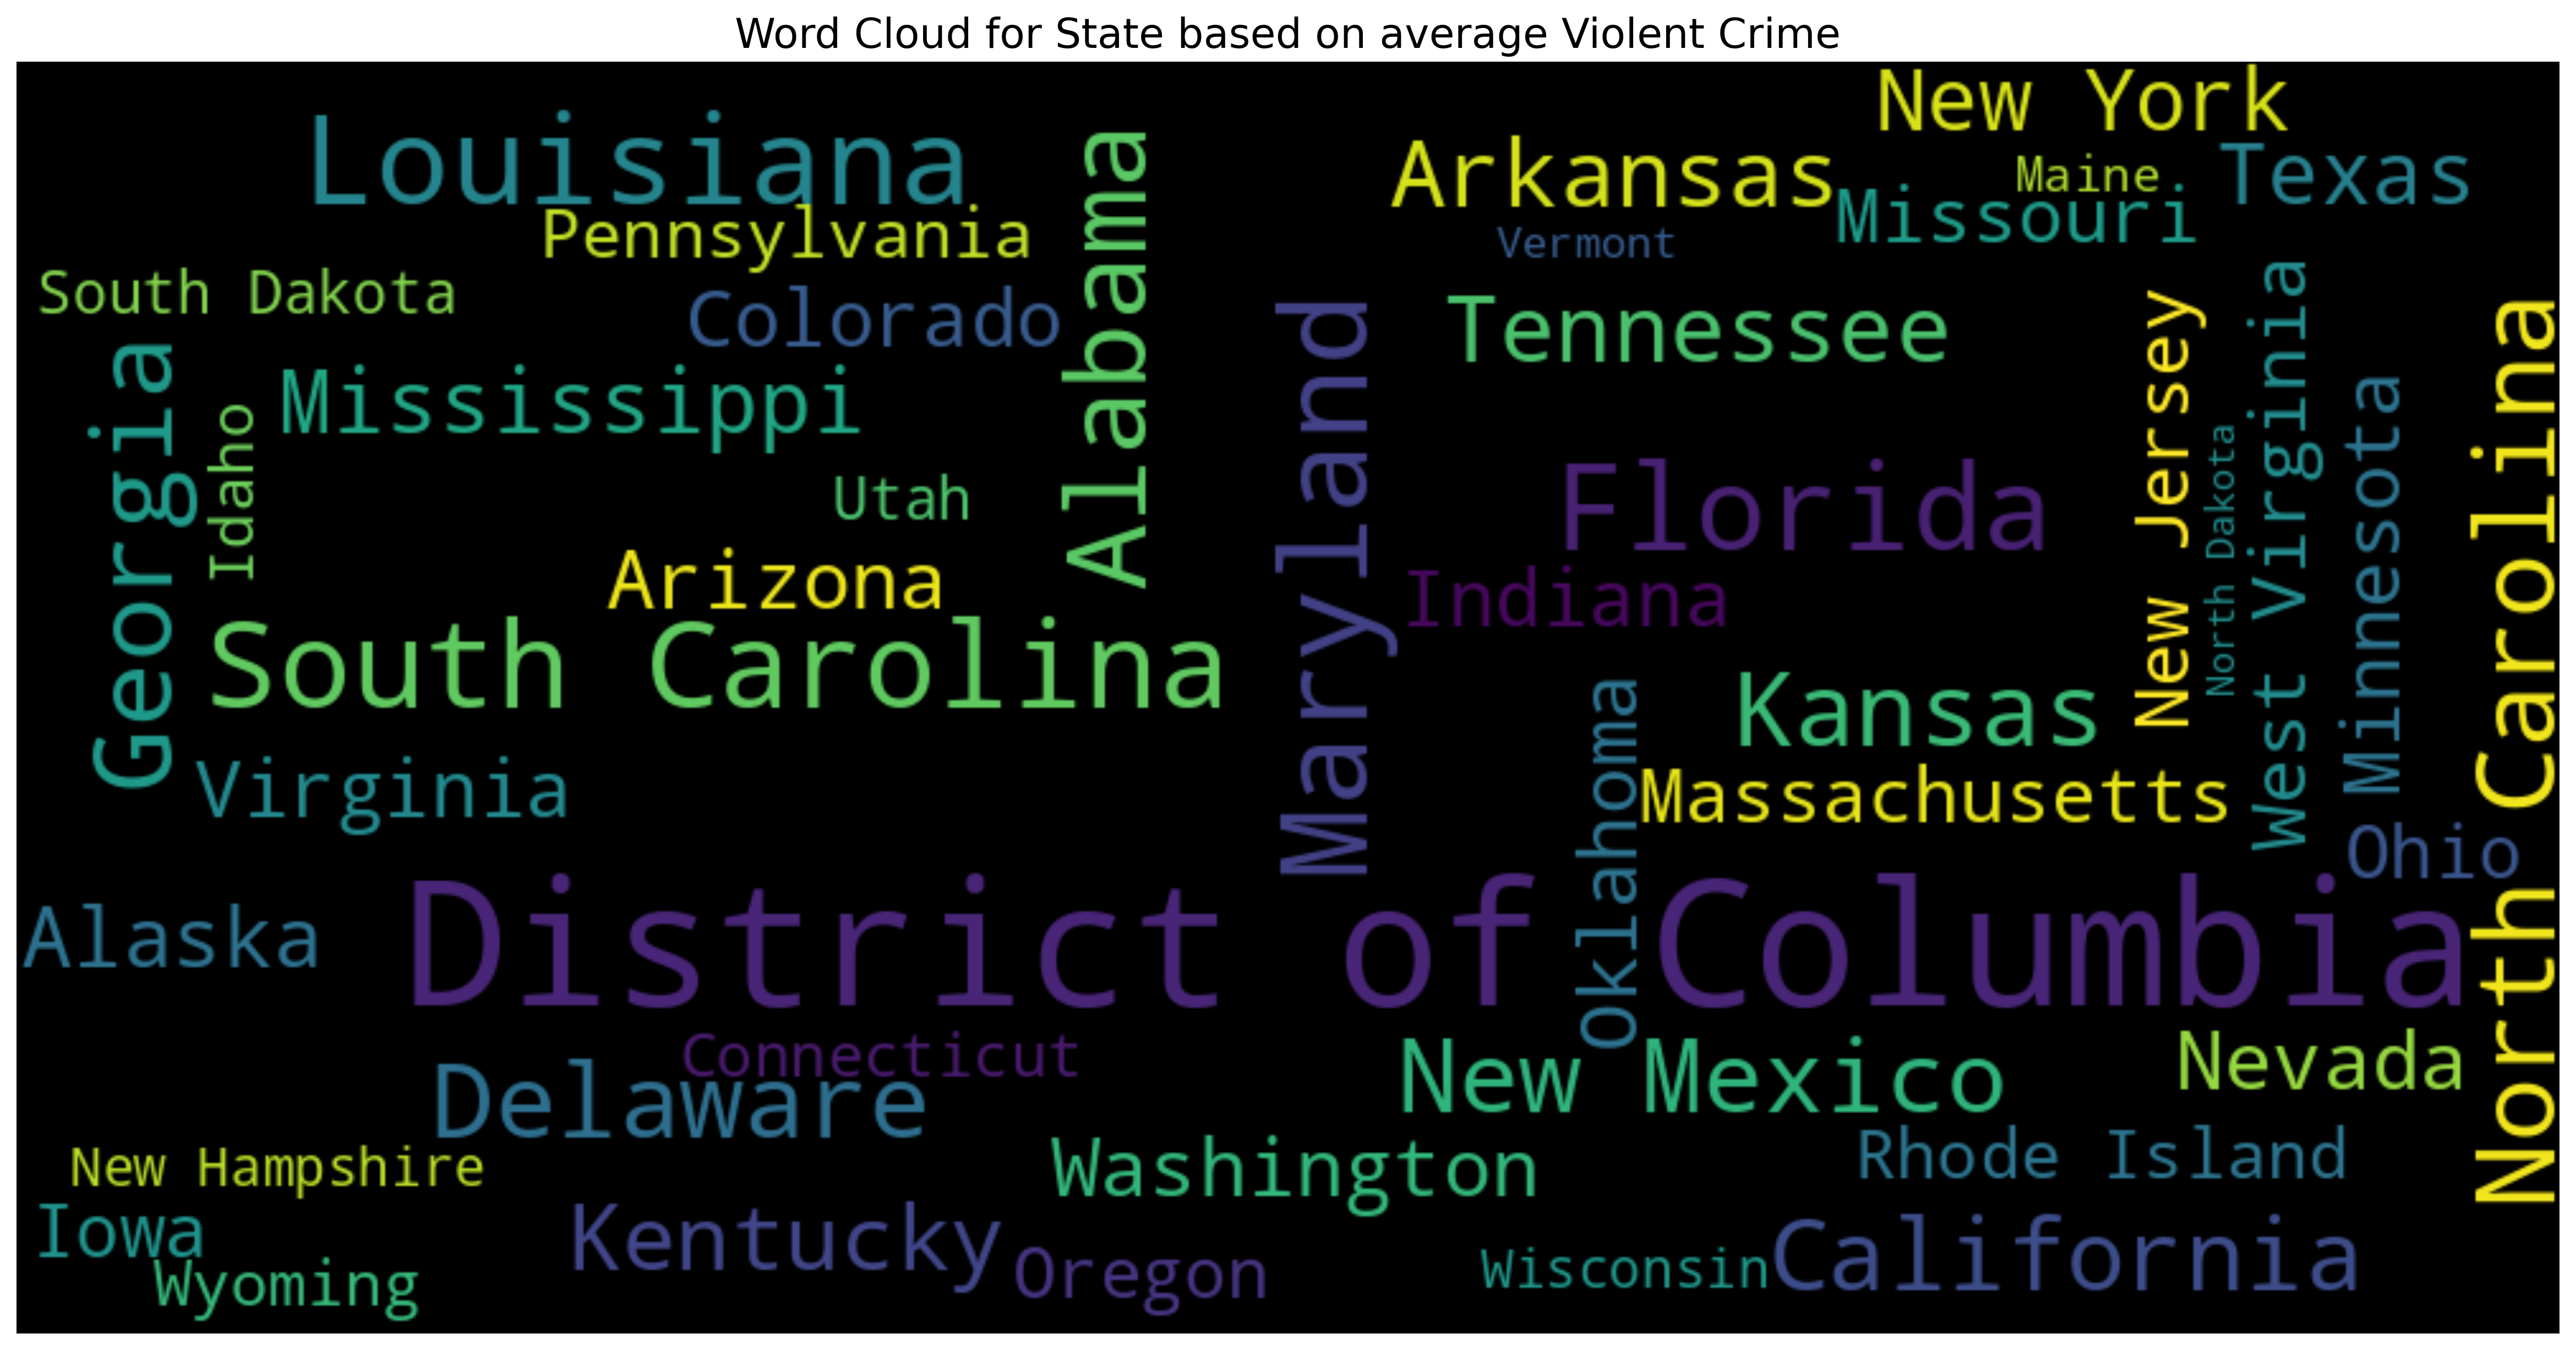

In [51]:
plt.figure(figsize=(20,10), dpi=300)
plt.imshow(wc_violent, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for State based on average Violent Crime", fontsize=18)

Text(0.5, 1.0, 'Word Cloud for State based on average Non Violent Crime')

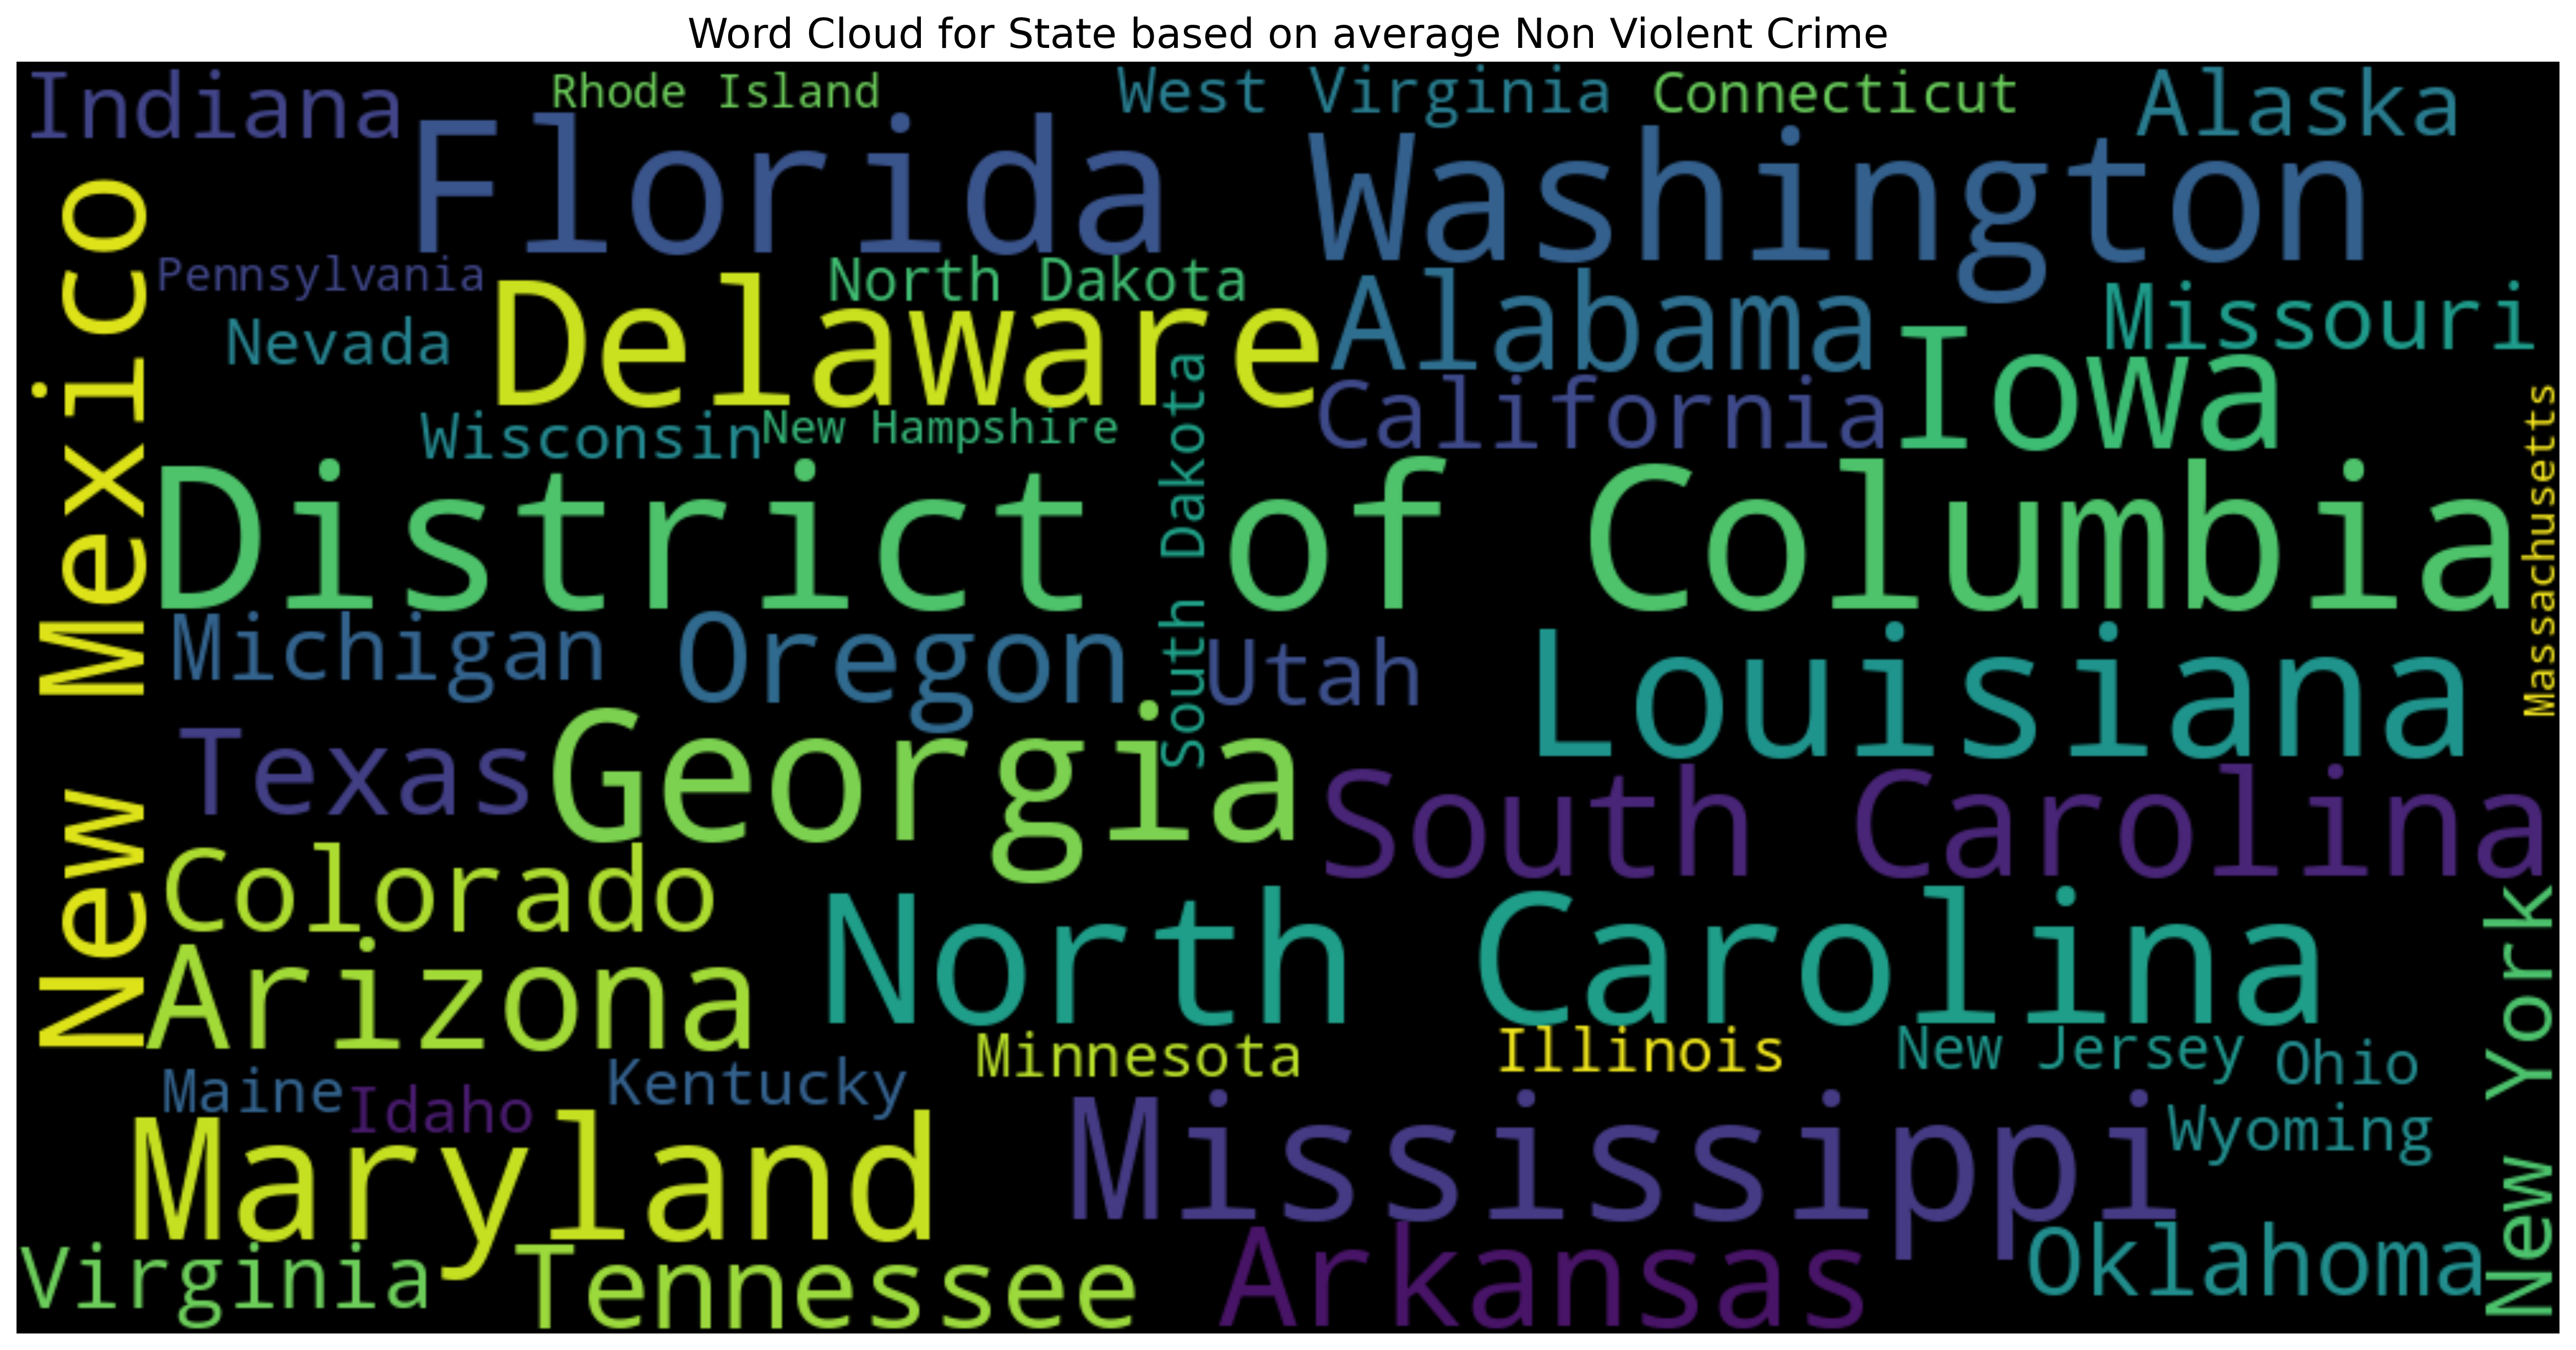

In [48]:
plt.figure(figsize=(20,10), dpi=300)
plt.imshow(wc_nonviolent, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for State based on average Non Violent Crime", fontsize=18)


#### Non violent crime by age%

Text(0, 0.5, 'age%')

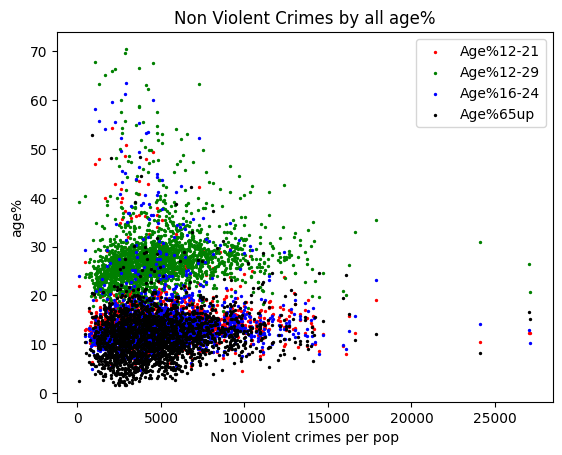

In [53]:

ax1 = crimedata.plot(x='nonViolPerPop', y='agePct12t21', kind='scatter', c='red', s=2, label='Age%12-21')
ax2 = crimedata.plot(x='nonViolPerPop', y='agePct12t29', kind='scatter', c='green', s=2, label='Age%12-29', ax=ax1)
ax3 = crimedata.plot(x='nonViolPerPop', y='agePct16t24', kind='scatter', c='blue', s=2, label='Age%16-24', ax=ax2)
ax4 = crimedata.plot(x='nonViolPerPop', y='agePct65up', kind='scatter', c='black', s=2, label='Age%65up', ax=ax3)
plt.title('Non Violent Crimes by all age%')
plt.xlabel('Non Violent crimes per pop')
plt.ylabel('age%')

#### Violent crime by age%

Text(0, 0.5, 'age%')

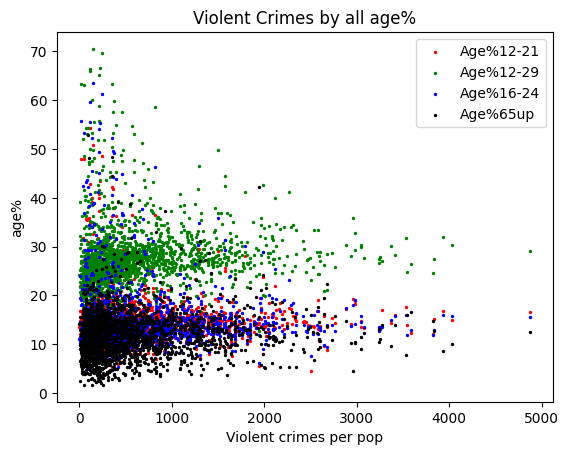

In [56]:

ax1 = crimedata.plot(x='ViolentCrimesPerPop', y='agePct12t21', kind='scatter', c='red', s=2, label='Age%12-21')
ax2 = crimedata.plot(x='ViolentCrimesPerPop', y='agePct12t29', kind='scatter', c='green', s=2, label='Age%12-29', ax=ax1)
ax3 = crimedata.plot(x='ViolentCrimesPerPop', y='agePct16t24', kind='scatter', c='blue', s=2, label='Age%16-24', ax=ax2)
ax4 = crimedata.plot(x='ViolentCrimesPerPop', y='agePct65up', kind='scatter', c='black', s=2, label='Age%65up', ax=ax3)
plt.title('Violent Crimes by all age%')
plt.xlabel('Violent crimes per pop')
plt.ylabel('age%')

In [60]:
crimedata.isnull().sum()

crimeOccurence            3
communityName             3
statecode                 0
countyCode             1224
communityCode          1227
                       ... 
ViolentCrimesPerPop     224
nonViolPerPop           100
State                     0
Region                    0
Division                  0
Length: 151, dtype: int64

In [63]:
crimedata = crimedata.drop(columns=['State','countyCode',
                          'communityCode','communityName',
                          'fold'], axis=1)
crimedata.head()

crimeOccurence statecode  population  householdsize  racepctblack  \
0             1.0        AK    226338.0           2.74          6.43   
1             1.0        AK     26751.0           2.70          1.09   
2             1.0        AK     30843.0           2.83         12.96   
3             0.0        AL     23755.0           2.72         58.44   
4             0.0        AL     33497.0           2.66         58.37   

   racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
0         80.74          4.82         4.09        13.96        28.98  ...   
1         80.63          4.31         2.80        12.55        24.66  ...   
2         72.35          3.28         5.37        15.45        35.12  ...   
3         41.00          0.43         0.29        16.96        27.15  ...   
4         41.41          0.07         0.23        14.37        25.80  ...   

   larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  arsonsPerPop  \
0    10660.0     4205.13     1387.0           547.14   105.0         41.42   
1      857.0     2966.01       59.0           204.19     7.0         24.23   
2     1460.0     4268.13      241.0           704.53     2.0          5.85   
3     1846.0     7430.07      131.0           527.27     NaN           NaN   
4     1689.0     5265.29      442.0          1377.89    38.0        118.46   

   ViolentCrimesPerPop  nonViolPerPop  Region            Division  
0               872.98        5535.31    West             Pacific  
1               114.21        3637.43    West             Pacific  
2               742.54        5712.28    West             Pacific  
3              3268.26            NaN   South  East South Central  
4              2758.90        9695.12   South  East South Central  

[5 rows x 146 columns]

In [64]:
crimedata = crimedata.replace('?', np.nan)
feat_miss = crimedata.columns[crimedata.isnull().any()]
feat_miss

Index(['crimeOccurence', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct16t24',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=143)

In [65]:
len(feat_miss)

143

###### select numeric values from a DataFrame

In [66]:
# Select numeric columns
numeric_df = crimedata.select_dtypes(include=['number'])

print("Numeric Columns:")
numeric_df.head()

Numeric Columns:


crimeOccurence  population  householdsize  racepctblack  racePctWhite  \
0             1.0    226338.0           2.74          6.43         80.74   
1             1.0     26751.0           2.70          1.09         80.63   
2             1.0     30843.0           2.83         12.96         72.35   
3             0.0     23755.0           2.72         58.44         41.00   
4             0.0     33497.0           2.66         58.37         41.41   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
0          4.82         4.09        13.96        28.98        13.23  ...   
1          4.31         2.80        12.55        24.66        10.53  ...   
2          3.28         5.37        15.45        35.12        18.14  ...   
3          0.43         0.29        16.96        27.15        13.50  ...   
4          0.07         0.23        14.37        25.80        12.78  ...   

   burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  \
0      1880.0       741.62    10660.0     4205.13     1387.0           547.14   
1       128.0       443.00      857.0     2966.01       59.0           204.19   
2       251.0       733.77     1460.0     4268.13      241.0           704.53   
3       590.0      2374.72     1846.0     7430.07      131.0           527.27   
4       941.0      2933.47     1689.0     5265.29      442.0          1377.89   

   arsons  arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0   105.0         41.42               872.98        5535.31  
1     7.0         24.23               114.21        3637.43  
2     2.0          5.85               742.54        5712.28  
3     NaN           NaN              3268.26            NaN  
4    38.0        118.46              2758.90        9695.12  

[5 rows x 143 columns]

### Use Knn to fill in gaps

In [100]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=10)

# Impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
df_imputed.head()

crimeOccurence  population  householdsize  racepctblack  racePctWhite  \
0             1.0    226338.0           2.74          6.43         80.74   
1             1.0     26751.0           2.70          1.09         80.63   
2             1.0     30843.0           2.83         12.96         72.35   
3             0.0     23755.0           2.72         58.44         41.00   
4             0.0     33497.0           2.66         58.37         41.41   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
0          4.82         4.09        13.96        28.98        13.23  ...   
1          4.31         2.80        12.55        24.66        10.53  ...   
2          3.28         5.37        15.45        35.12        18.14  ...   
3          0.43         0.29        16.96        27.15        13.50  ...   
4          0.07         0.23        14.37        25.80        12.78  ...   

   burglaries  burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  \
0      1880.0       741.62    10660.0     4205.13     1387.0           547.14   
1       128.0       443.00      857.0     2966.01       59.0           204.19   
2       251.0       733.77     1460.0     4268.13      241.0           704.53   
3       590.0      2374.72     1846.0     7430.07      131.0           527.27   
4       941.0      2933.47     1689.0     5265.29      442.0          1377.89   

   arsons  arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0   105.0         41.42               872.98       5535.310  
1     7.0         24.23               114.21       3637.430  
2     2.0          5.85               742.54       5712.280  
3    10.4         50.44              3268.26       8435.215  
4    38.0        118.46              2758.90       9695.120  

[5 rows x 143 columns]

In [90]:
df_imputed.to_dict().keys()

dict_keys(['crimeOccurence', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'P

In [110]:
df_imputed['murders'].values/df_imputed['murders'].values.max()

array([0.01181912, 0.        , 0.00308325, ..., 0.00051387, 0.        ,
       0.00051387])

In [137]:
arr = df_imputed['murders'].values.copy()

# Normalizing the array to range between 0 and 1
normalized_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) * 10
#  arr/arr.max() 


# Classifying the values as low or high risk
df_imputed['risk_category'] = np.where(normalized_arr < 0.004, 'Low Risk', 'High Risk')
# Define the mapping dictionary
mapping = {
    'Low Risk': 0,
    'High Risk': 1,
    # 'high risk': 2,
    # 'very high risk': 3
}

# Apply the mapping to the risk_category column
df_imputed['risk_category_mapped'] = df_imputed['risk_category'].map(mapping)

# df


In [138]:
Xd = df_imputed.drop(columns=['murders', 'risk_category', 'risk_category_mapped'])
yd = df_imputed['risk_category_mapped']

In [139]:
list(yd).count(1)

1192

In [140]:
yd.shape

(2218,)

In [141]:
df_imputed.isnull().sum()

crimeOccurence          0
population              0
householdsize           0
racepctblack            0
racePctWhite            0
                       ..
arsonsPerPop            0
ViolentCrimesPerPop     0
nonViolPerPop           0
risk_category           0
risk_category_mapped    0
Length: 145, dtype: int64

### AI Aspect

* Two confusion matrices (one for each MLP model).
* Two classification reports (corresponding to each confusion matrix).
* One figure for the ROC curves of both MLP models.
* Two decision boundary plots (one for each MLP model).

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits


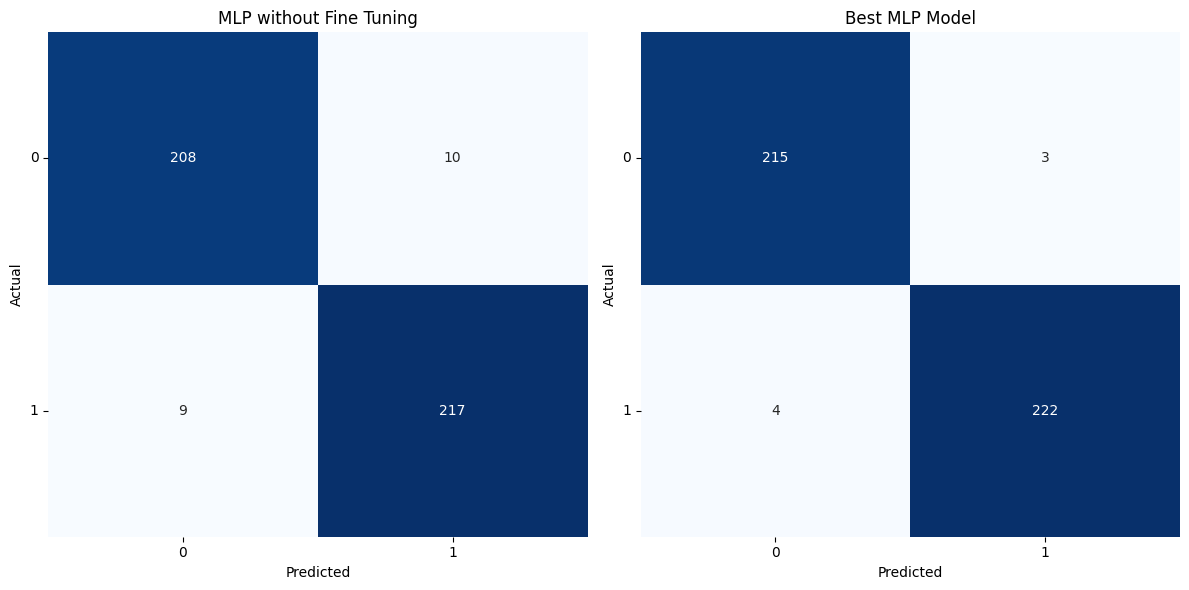

Classification Report for MLP without Fine Tuning:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       218
           1       0.96      0.96      0.96       226

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444


Classification Report for Best MLP Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       218
           1       0.99      0.98      0.98       226

    accuracy                           0.98       444
   macro avg       0.98      0.98      0.98       444
weighted avg       0.98      0.98      0.98       444



/home/dara/my_project/venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/home/dara/my_project/venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


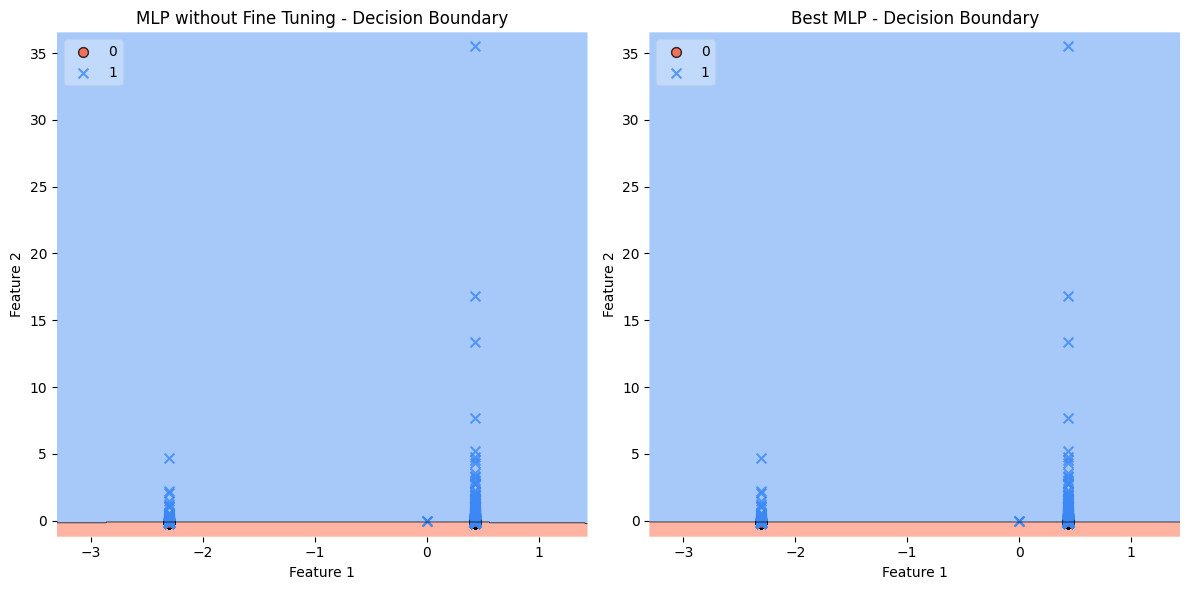

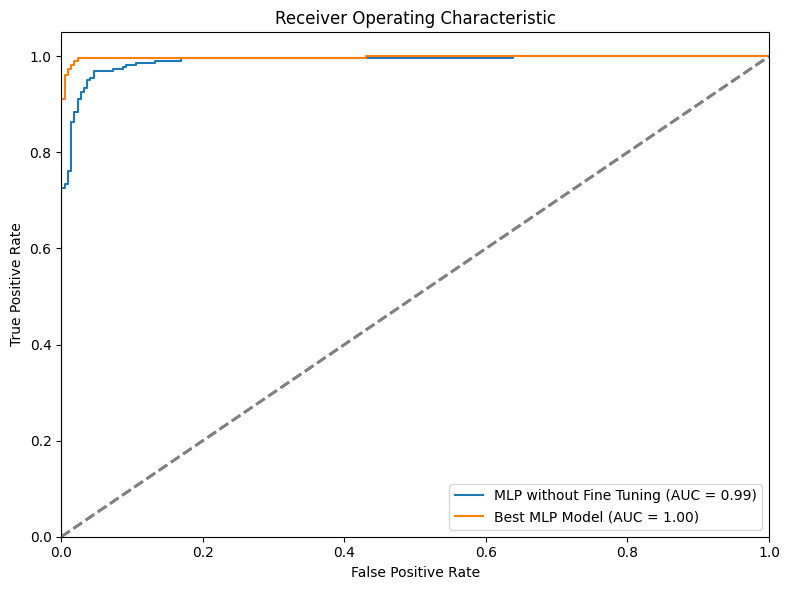

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

# Split data into features (X) and target (y)
X = Xd  # Features
y = yd  # Target

# Standardize the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# MLP without fine-tuning using all features
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train, y_train)

# Use GridSearchCV to find best parameters for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500]
}

grid_search = GridSearchCV(estimator=MLPClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Use 3-fold cross-validation
                           verbose=1)
grid_search.fit(X_train, y_train)
best_mlp = grid_search.best_estimator_

# Train MLP model for decision boundary visualization (using only the first 2 features)
X_train_subset = X_train[:, :2]
X_test_subset = X_test[:, :2]

mlp_2features = MLPClassifier(random_state=42, max_iter=500)
mlp_2features.fit(X_train_subset, y_train)

best_mlp_2features = GridSearchCV(estimator=MLPClassifier(random_state=42),
                                  param_grid=param_grid,
                                  cv=3,
                                  verbose=1)
best_mlp_2features.fit(X_train_subset, y_train)
best_mlp_2features = best_mlp_2features.best_estimator_

# Function to plot confusion matrix manually
def plot_confusion_matrix_subplot(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.xaxis.set_tick_params(rotation=0)
    ax.yaxis.set_tick_params(rotation=0)

# Function to generate classification report
def generate_classification_report(clf, X, y):
    y_pred = clf.predict(X)
    report = classification_report(y, y_pred)
    return report

# Function to plot ROC curve
def plot_roc_curve_subplot(ax, clf, X, y, title):
    y_score = clf.predict_proba(X)
    fpr, tpr, _ = roc_curve(y, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)  # Plot diagonal line

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')

# Function to plot decision boundary
def plot_decision_boundary_subplot(ax, clf, X, y, title):
    plot_decision_regions(X, y, clf=clf, legend=2, markers='ox', colors='#FF5733,#3C88F5', scatter_kwargs={'s': 50}, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)

# Initialize subplots for confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for MLP without fine tuning
cm1 = confusion_matrix(y_test, mlp.predict(X_test))
plot_confusion_matrix_subplot(axs[0], cm1, title="MLP without Fine Tuning")

# Plot confusion matrix for best MLP model from GridSearch
cm2 = confusion_matrix(y_test, best_mlp.predict(X_test))
plot_confusion_matrix_subplot(axs[1], cm2, title="Best MLP Model")

plt.tight_layout()
plt.show()

# Generate classification reports
print("Classification Report for MLP without Fine Tuning:")
print(generate_classification_report(mlp, X_test, y_test))

print("\nClassification Report for Best MLP Model:")
print(generate_classification_report(best_mlp, X_test, y_test))

# Initialize subplots for decision boundaries
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot decision boundary for MLP without fine tuning using first 2 features
plot_decision_boundary_subplot(axs[0], mlp_2features, X_train_subset, y_train, title="MLP without Fine Tuning - Decision Boundary")
plot_decision_boundary_subplot(axs[1], best_mlp_2features, X_train_subset, y_train, title="Best MLP - Decision Boundary")

plt.tight_layout()
plt.show()

# Plot ROC curves for both MLP models in one figure
fig, ax = plt.subplots(figsize=(8, 6))

plot_roc_curve_subplot(ax, mlp, X_test, y_test, title="MLP without Fine Tuning")
plot_roc_curve_subplot(ax, best_mlp, X_test, y_test, title="Best MLP Model")

plt.tight_layout()
plt.show()


In [152]:
!pwd

/home/dara/my_project/anarh/codes
